Прежде чем запускать следующее, нужно пройти VK-авторизацию!

In [3]:
%%javascript
var kernel = IPython.notebook.kernel;
var command = "currentUrl = " + "'" + window.location + "'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [4]:
from urlparse import urlparse

r = urlparse(currentUrl)
code = r.query[5:]

url = ("https://oauth.vk.com/access_token"
       "?client_id=5429181" 
       "&client_secret=uAZqxwa2hgjLa4KLvbTG"
       "&code=" + code +
       "&redirect_uri="  + r.scheme + "://" + r.netloc + r.path)

In [6]:
import json
import urllib2   

data = json.load(urllib2.urlopen(url))
accessToken = data['access_token']

# Достаем участников группы

In [235]:
from urllib import urlencode
import time

groups = ["109490789", 
          "2100831", 
          "11912933", 
          "1167943", 
          "15335079", 
          "12813079", 
          "68478644",
          "16vzvoduvo",
          "59565067",
          "61511779",
          "1182973",
          "1119648",
          "21754234",
          "14294712",
          "7591998",
          "8702762",
          "23386497",
          "1566321",
          "55523638"]

users = []

for group in groups:
    params = {"group_id": group, 
              "count": 500, 
              "fields": "sex,education,universities,schools",
              "access_token": accessToken}
    params = urlencode(params)

    url = "https://api.vk.com/method/groups.getMembers?" + params
    data = json.load(urllib2.urlopen(url))
    data_users = data['response']['users']
    
    print("extracted %d users from %s" % (len(data_users), group))
    users.extend(data_users)
    time.sleep(1)
    
print("sum: %d" % len(users))

extracted 26 users from 109490789
extracted 326 users from 2100831
extracted 51 users from 11912933
extracted 104 users from 1167943
extracted 41 users from 15335079
extracted 31 users from 12813079
extracted 17 users from 68478644
extracted 13 users from 16vzvoduvo
extracted 97 users from 59565067
extracted 30 users from 61511779
extracted 341 users from 1182973
extracted 233 users from 1119648
extracted 91 users from 21754234
extracted 8 users from 14294712
extracted 35 users from 7591998
extracted 34 users from 8702762
extracted 2 users from 23386497
extracted 86 users from 1566321
extracted 44 users from 55523638
sum: 1610


In [130]:
import numpy as np
import pandas as pd
import matplotlib
from collections import defaultdict
from matplotlib import pyplot as plt

import json

# Университеты полицейских

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


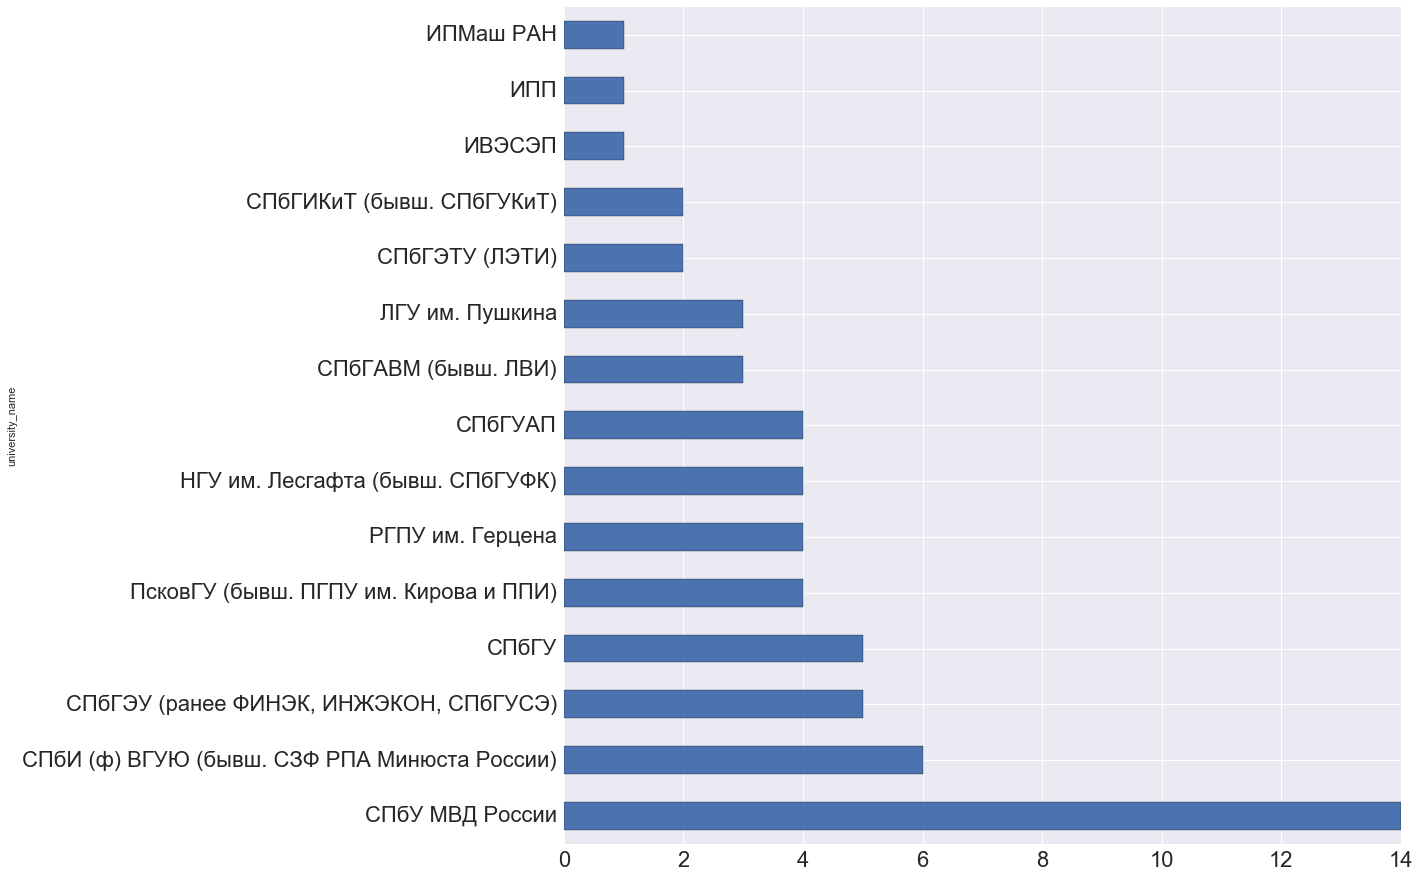

In [163]:
%matplotlib inline

df = pd.DataFrame(users)
df = df.groupby('university_name').size()

df.sort(['university_name'], ascending=False)
df = df.drop(df.index[[0]])

plt.figure(figsize=(15, 15))
matplotlib.rc('xtick', labelsize=22)
matplotlib.rc('ytick', labelsize=22)

df[:15].plot(kind='barh')

# Группы полицейских
Загружаем и кладем в файл

In [177]:
groups = {}

print("processing %d users" % len(users))
for i in range(0, len(users)):
    params = {"user_id": users[i]['uid'], 
              "extended": 0, 
              "access_token": accessToken}
    params = urlencode(params)

    url = "https://api.vk.com/method/groups.get?" + params
    data = json.load(urllib2.urlopen(url))
    
    if data.get('response', ''):
        user_groups = data['response']
        for user_group in user_groups:
            groups[user_group] = groups.get(user_group, 0) + 1

        print "%d" % (i + 1),
    time.sleep(0.5)
    
f = open('datasets/groups.json','w')
f.write(json.dumps(groups))
f.close()

 processing 1310 users
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 120 121 122 123 124 125 126 127 128 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 148 149 150 151 152 153 154 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 183 184 185 186 187 188 189 190 191 192 193 194 195 197 198 199 200 201 202 204 205 206 207 208 209 210 211 212 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 269 270 271 272 273 274 276 277 278 279 280 281 282 283 284 28

{40239104: 1,
 1: 1,
 27656195: 1,
 11: 2,
 74973197: 1,
 54001678: 1,
 15: 2,
 16: 1,
 31588370: 8,
 31457299: 18,
 21: 1,
 81155417: 1,
 45875224: 2,
 82706459: 2,
 33685532: 1,
 30: 2,
 113901601: 1,
 56623138: 1,
 14811171: 1,
 75261789: 1,
 30277672: 18,
 41: 5,
 47: 2,
 54394928: 1,
 23636659: 2,
 52: 1,
 55: 1,
 57: 2,
 33685562: 5,
 19660860: 1,
 26738750: 1,
 66846783: 1,
 95551552: 1,
 55705670: 1,
 45744212: 2,
 78512215: 1,
 72351833: 1,
 24903773: 1,
 114360336: 1,
 45482083: 1,
 72504678: 1,
 14549096: 1,
 23953205: 1,
 13631506: 1,
 113: 1,
 22937717: 1,
 29884535: 8,
 1179772: 1,
 52119189: 1,
 24379524: 1,
 4369: 1,
 71041165: 2,
 54001807: 1,
 25559193: 1,
 62390428: 1,
 131231: 1,
 917531: 1,
 41812134: 1,
 12714151: 1,
 4587548: 2,
 171: 1,
 34603189: 3,
 24641719: 1,
 18088121: 1,
 56492222: 1,
 7864513: 1,
 262340: 11,
 25559245: 5,
 35: 1,
 67633366: 1,
 215: 1,
 393433: 1,
 218: 1,
 39059675: 2,
 38884730: 1,
 56885475: 2,
 70910181: 1,
 29753574: 1,
 67371241: 

### Загрузка из файла

In [198]:
import operator

with open('datasets/groups.json') as data_file:    
    groups = json.load(data_file)

### Достанем названия каждой из групп из API и сохраняем все в файл

In [229]:
sorted_groups = sorted(groups.items(), key=operator.itemgetter(1))
sorted_groups.reverse()

# ids of first 100 groups as string
group_ids = ",".join(map(lambda x: x[0], sorted_groups[:100]))
params = {"group_ids": group_ids}
params = urlencode(params)
url = "https://api.vk.com/method/groups.getById?" + params
data = json.load(urllib2.urlopen(url))

# function to "attach" people count to groups
def add_people_count(group_info):
    group_info['people_count'] = groups.get(str(group_info['gid']), 0)
    return group_info

if data.get('response', ''):
    groups_info = data['response']
    groups_info = map(add_people_count, groups_info)
    
    f = open('datasets/groups_info.json','w')
    f.write(json.dumps(groups_info))
    f.close()

### Загрузка полного датасета из файла и построение графика

In [230]:
with open('datasets/groups_info.json') as data_file:    
    groups_info = json.load(data_file)
    
groups_info

[{u'gid': 68471405,
  u'is_closed': 0,
  u'name': u'\u0414\u0422\u041f \u0438 \u0427\u041f | \u0421\u0430\u043d\u043a\u0442-\u041f\u0435\u0442\u0435\u0440\u0431\u0443\u0440\u0433 | \u041f\u0438\u0442\u0435\u0440 \u041e\u043d\u043b\u0430\u0439\u043d | \u0421\u041f\u0411',
  u'people_count': 284,
  u'photo': u'http://cs619829.vk.me/v619829388/21366/vYTcGC5ypk8.jpg',
  u'photo_big': u'http://cs619829.vk.me/v619829388/21364/P8GqEMRFagk.jpg',
  u'photo_medium': u'http://cs619829.vk.me/v619829388/21365/CbObpVLjOj4.jpg',
  u'screen_name': u'spb_today',
  u'type': u'page'},
 {u'gid': 18901857,
  u'is_closed': 0,
  u'name': u'\u0424\u043e\u043d\u0442\u0430\u043d\u043a\u0430. \u041d\u043e\u0432\u043e\u0441\u0442\u0438 \u041f\u0435\u0442\u0435\u0440\u0431\u0443\u0440\u0433\u0430',
  u'people_count': 183,
  u'photo': u'http://cs624818.vk.me/v624818690/42dfd/k1Pf2itOA9U.jpg',
  u'photo_big': u'http://cs624818.vk.me/v624818690/42dfb/cVzQJaMJ7mQ.jpg',
  u'photo_medium': u'http://cs624818.vk.me/v62481

In [234]:
%matplotlib inline

df = pd.DataFrame(groups_info)
#plt.figure(figsize=(15, 15))
#matplotlib.rc('xtick', labelsize=22)
#matplotlib.rc('ytick', labelsize=22)

#df[:50].plot(kind='barh')

df.groupby('people_count')
df

,gid,is_closed,name,people_count,photo,photo_big,photo_medium,screen_name,type
0,68471405,0,ДТП и ЧП | Санкт-Петербург | Питер Онлайн | СПБ,284,http://cs619829.vk.me/v619829388/21366/vYTcGC5...,http://cs619829.vk.me/v619829388/21364/P8GqEMR...,http://cs619829.vk.me/v619829388/21365/CbObpVL...,spb_today,page
1,18901857,0,Фонтанка. Новости Петербурга,183,http://cs624818.vk.me/v624818690/42dfd/k1Pf2it...,http://cs624818.vk.me/v624818690/42dfb/cVzQJaM...,http://cs624818.vk.me/v624818690/42dfc/Y1nn5aU...,fontanka,page
2,24732375,0,ПОЛИЦИЯ РОССИИ,177,http://cs622022.vk.me/v622022618/341e1/8-W92Oc...,http://cs622022.vk.me/v622022618/341df/DJiB0jL...,http://cs622022.vk.me/v622022618/341e0/GI0d9vT...,russianpolice,page
3,26270763,0,Интересные события в Санкт-Петербурге,148,http://cs10051.vk.me/g26270763/e_da77fa38.jpg,http://cs10051.vk.me/g26270763/d_b3aad494.jpg,http://cs10051.vk.me/g26270763/d_b3aad494.jpg,blog_fiesta,page
4,31516466,0,"Это Питер, детка! [Типичный Питер]",143,http://cs410721.vk.me/v410721858/6368/ADKUmSHK...,http://cs410721.vk.me/v410721858/6366/9uc2XLju...,http://cs410721.vk.me/v410721858/6367/a_9UHZi7...,piter,page
5,29246653,0,Корпорация Зла,132,http://cs626623.vk.me/v626623112/11e8/XBOboQrB...,http://cs626623.vk.me/v626623112/11e6/z7qFalJ_...,http://cs626623.vk.me/v626623112/11e7/0em3snKB...,evil_incorparate,page
6,22798006,0,Киномания,127,http://cs406821.vk.me/v406821288/9b33/9BvYlDL_...,http://cs406821.vk.me/v406821288/9b31/22QaYtrb...,http://cs406821.vk.me/v406821288/9b32/xVbDCzOj...,kino_mania,page
7,28477986,0,Ты не поверишь!,123,http://cs625421.vk.me/v625421025/16074/wNrSkOn...,http://cs625421.vk.me/v625421025/16072/BBz_cxz...,http://cs625421.vk.me/v625421025/16073/AXnnjPI...,ti_nepoverish,page
8,28464698,0,Подслушано у Полиции,117,http://cs633928.vk.me/v633928455/1083f/qQ9EDBj...,http://cs633928.vk.me/v633928455/1083d/d_0vIAn...,http://cs633928.vk.me/v633928455/1083e/X1F8yzE...,overhear_police,page
9,43215063,0,Киномания - фильмы онлайн,109,http://cs627719.vk.me/v627719381/4ab6d/ARMvyNw...,http://cs627719.vk.me/v627719381/4ab6b/TGjLOn9...,http://cs627719.vk.me/v627719381/4ab6c/xpVC18P...,kinomania,page
